I - Charger et explorer le jeu de données afin de comprendre sa structure et ses caractéristiques principales.
    
     - Importer le dataset avec pandas

In [387]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/dataset-diabete.csv')

     - Inspecter la structure des données : colonnes, types, dimensions

In [388]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [389]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


     - Vérifier les doublons et les valeurs manquantes

In [391]:
df.duplicated().sum()

np.int64(0)

In [392]:
df[df.duplicated()]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [393]:
df = df.replace(0, np.nan)  
df.isnull().sum()
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,2.0,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,3.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763.0,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,764.0,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,765.0,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,766.0,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


     - Utilise KNN pour remplacer les valeur null
    

In [394]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  

df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns=df.columns)

     - Analyser la distribution des variables numériques (histogrammes, boxplots).

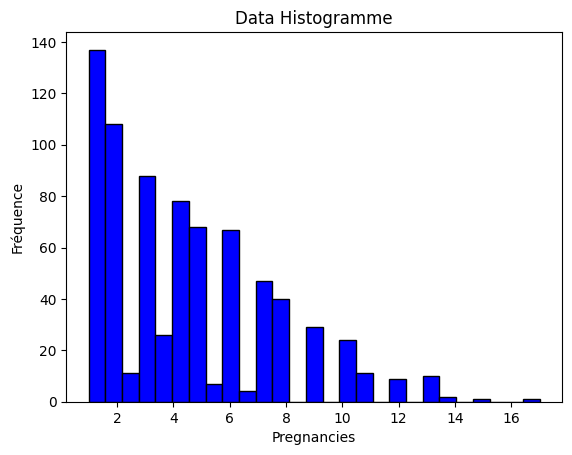

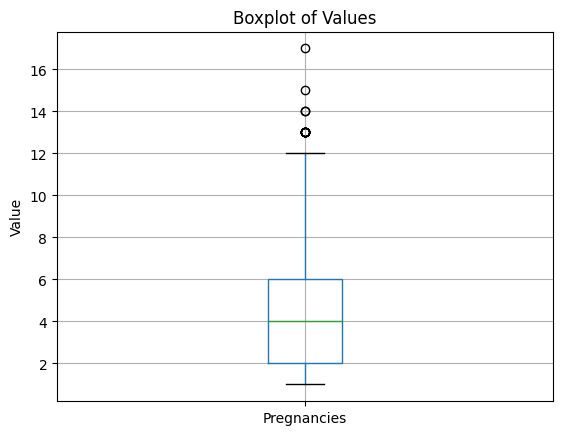

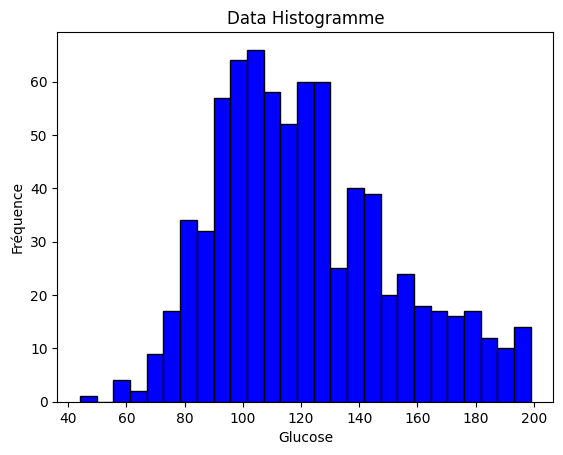

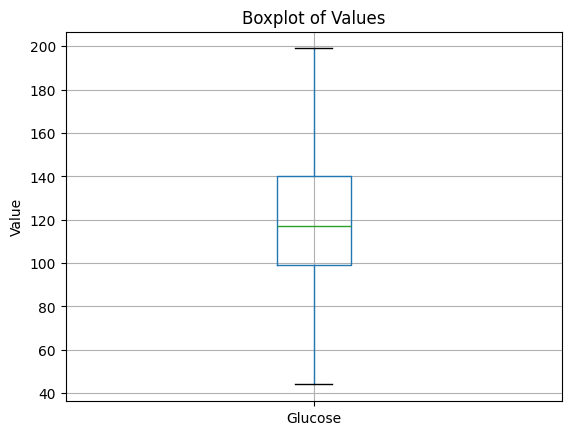

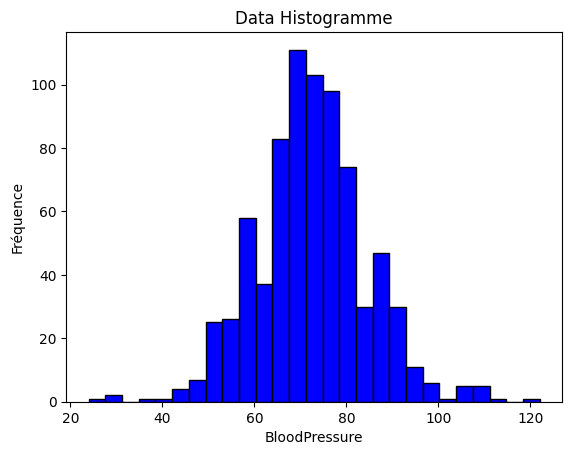

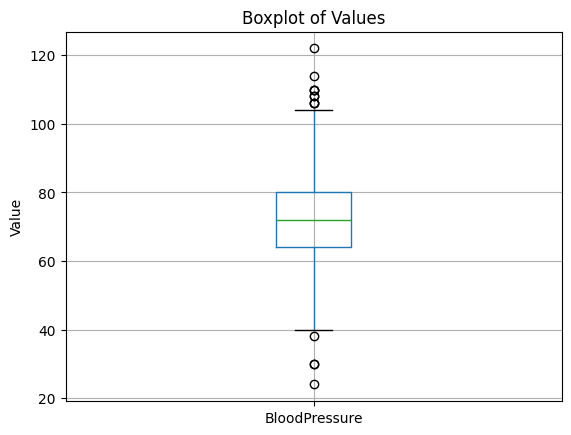

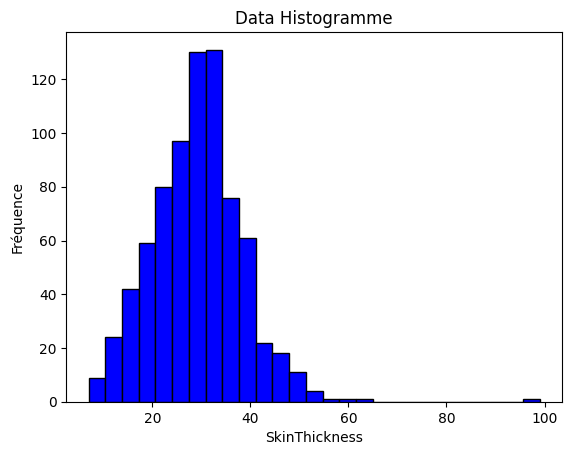

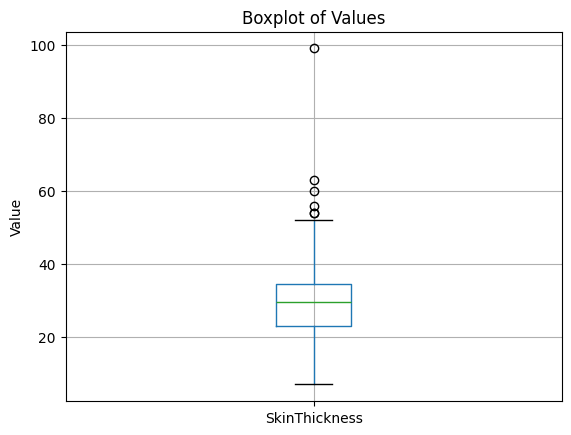

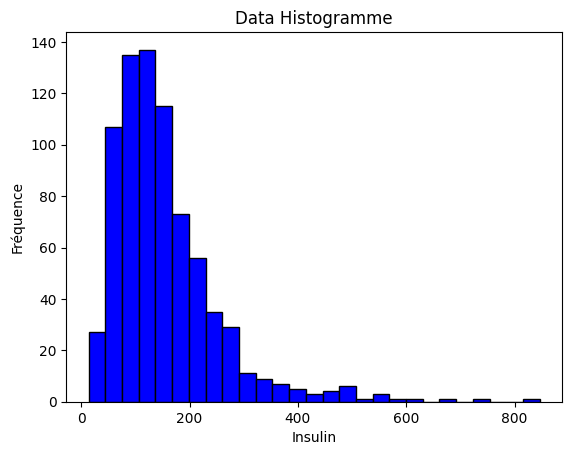

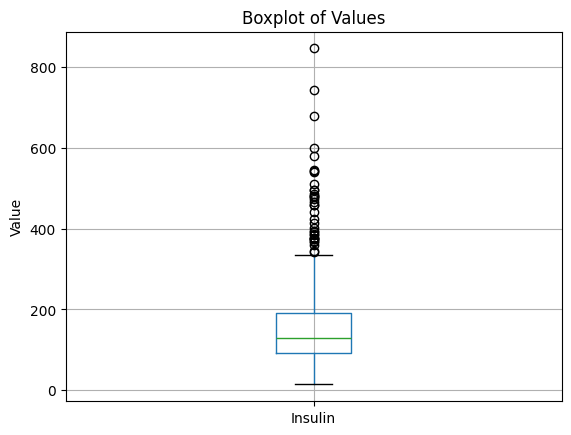

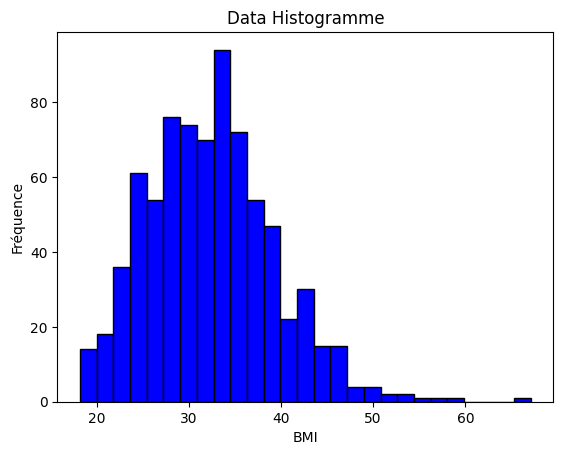

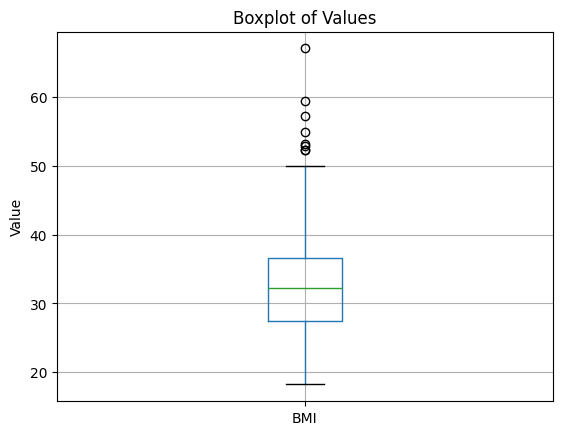

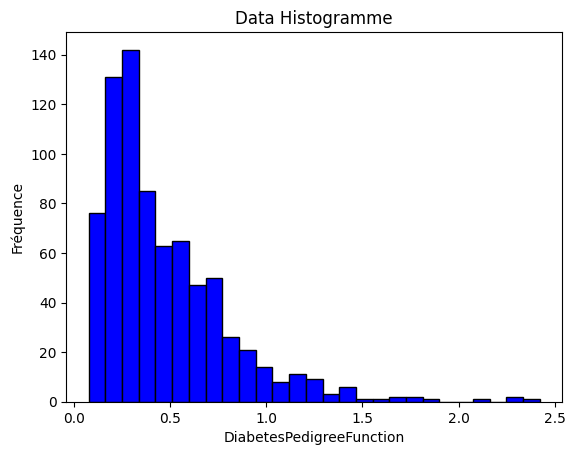

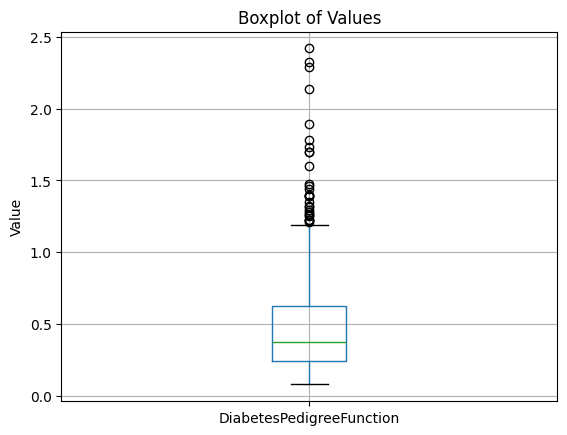

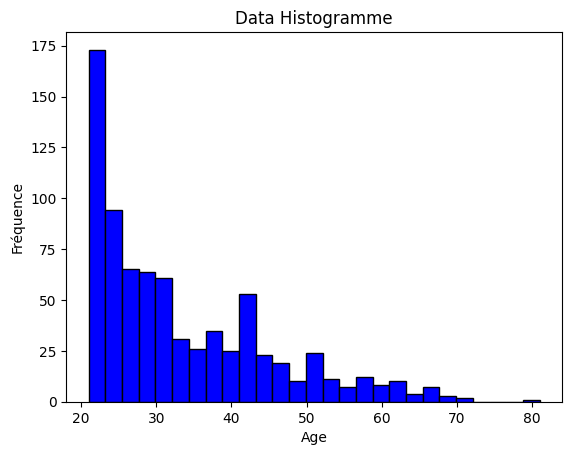

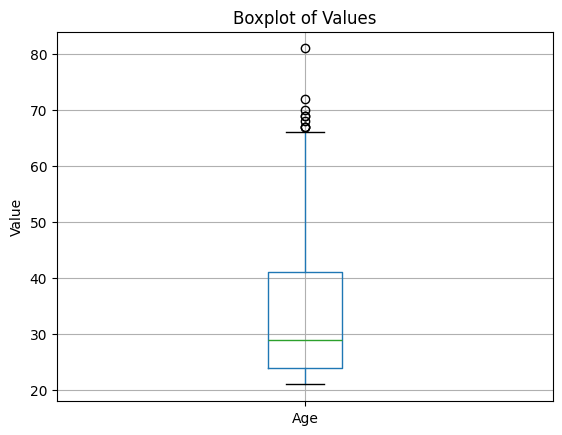

In [395]:
import matplotlib.pyplot as plt
import math

df = df.drop(columns =["Unnamed: 0" ])

for i in df.columns :

    plt.hist(df[i], bins=int(math.sqrt(df.shape[0])), color='blue', edgecolor='black')
    plt.title("Data Histogramme")
    plt.xlabel(i)
    plt.ylabel("Fréquence")
    plt.show()

    df.boxplot(column=i)
    plt.title("Boxplot of Values")
    plt.ylabel("Value")
    plt.show()


    - Supprimer les valeurs aberrantes

In [396]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,94.4,26.6,0.351,31.0
2,8.0,183.0,64.0,29.6,375.8,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,7.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


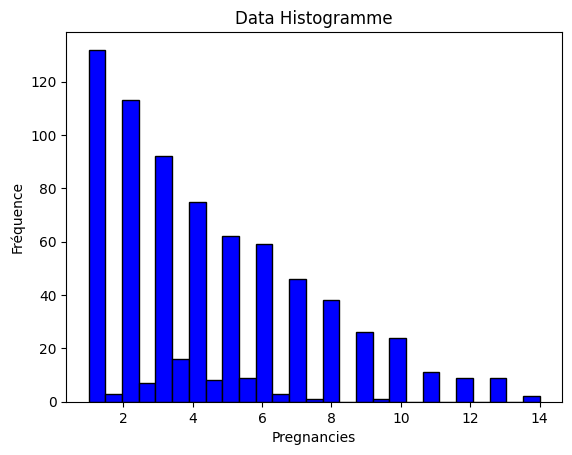

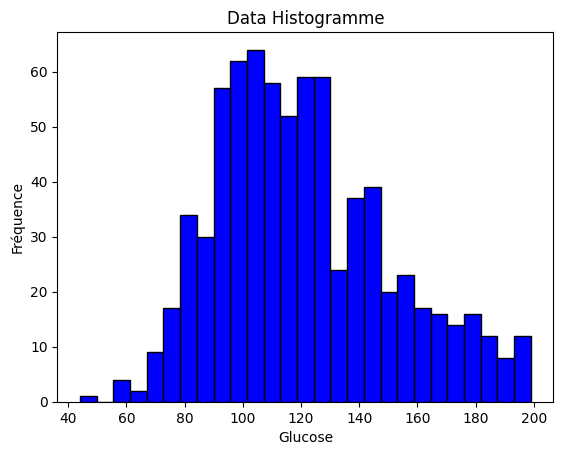

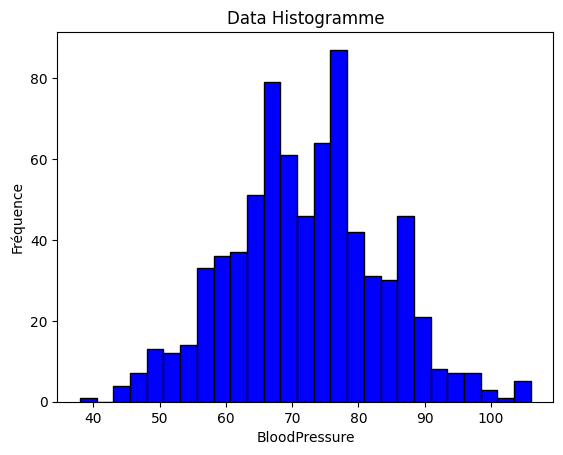

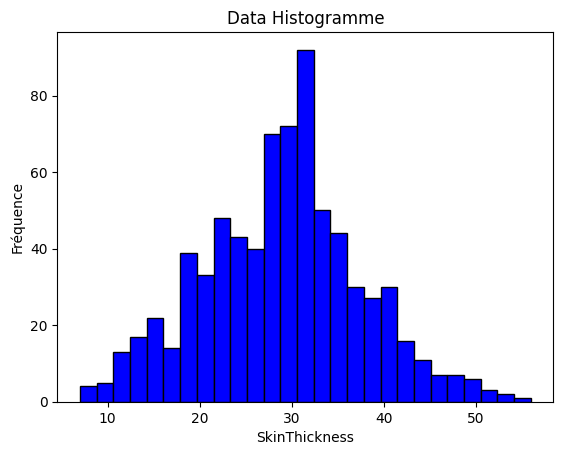

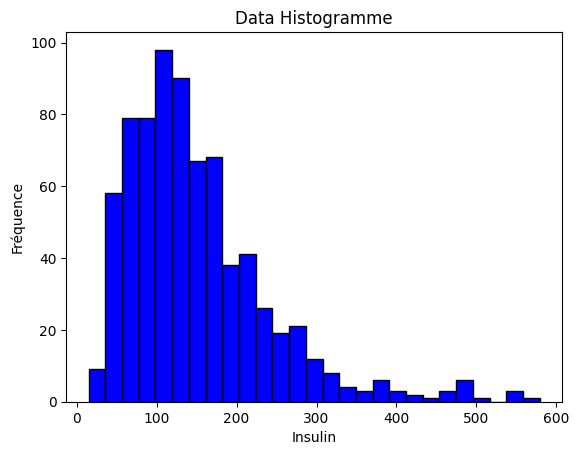

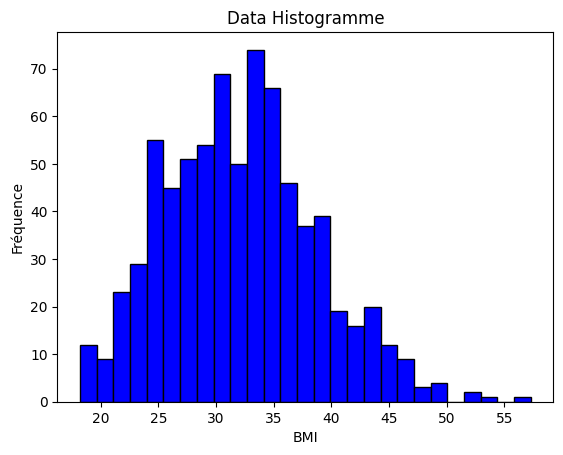

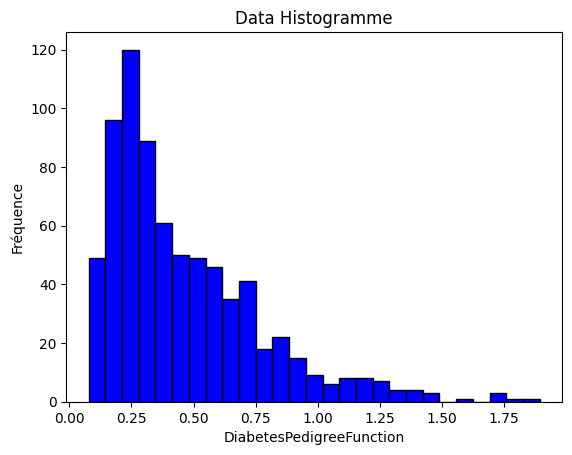

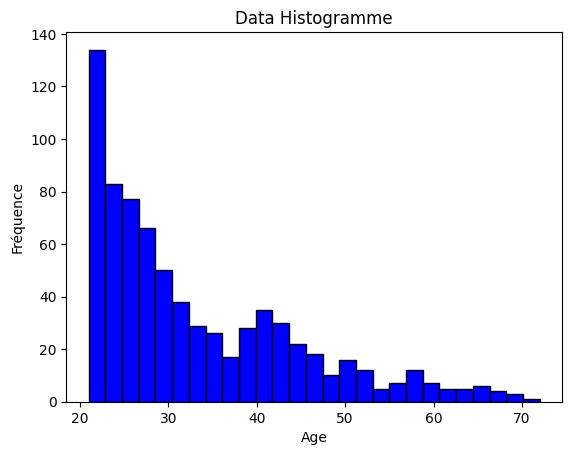

In [397]:
df_no_outliers = df.copy()

#Pregnancies

Q1 = df_no_outliers["Pregnancies"].quantile(0.25)
Q3 = df_no_outliers["Pregnancies"].quantile(0.75)
IQR = Q3 - Q1
Pregnancies_upper_band = Q3 + 2 * IQR
df_no_outliers = df_no_outliers[(df_no_outliers["Pregnancies"] <= Pregnancies_upper_band)]

#BloodPressure
Q1 = df_no_outliers["BloodPressure"].quantile(0.25)
Q3 = df_no_outliers["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
BloodPressure_lower_band = Q1 - 1.7 * IQR
BloodPressure_upper_band = Q3 + 1.7 * IQR

df_no_outliers.loc[df_no_outliers["BloodPressure"] > BloodPressure_upper_band, "BloodPressure"] = np.log1p(df_no_outliers.loc[df_no_outliers["BloodPressure"] > BloodPressure_upper_band, "BloodPressure"])

df_no_outliers = df_no_outliers[(df_no_outliers["BloodPressure"] >= BloodPressure_lower_band)]


Q1 = df_no_outliers["SkinThickness"].quantile(0.25)
Q3 = df_no_outliers["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
SkinThickness_upper_band = Q3 + 2.2 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["SkinThickness"] <= SkinThickness_upper_band)]


Q1 = df_no_outliers["Insulin"].quantile(0.25)
Q3 = df_no_outliers["Insulin"].quantile(0.75)
IQR = Q3 - Q1
Insulin_upper_band = Q3 + 4 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["Insulin"] <= Insulin_upper_band)]

Q1 = df_no_outliers["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df_no_outliers["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
DiabetesPedigreeFunction_upper_band = Q3 + 4 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["DiabetesPedigreeFunction"] <= DiabetesPedigreeFunction_upper_band)]

Q1 = df_no_outliers["Age"].quantile(0.25)
Q3 = df_no_outliers["Age"].quantile(0.75)
IQR = Q3 - Q1
Age_upper_band = Q3 + 2 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["Age"] <= Age_upper_band)]


for i in df_no_outliers.columns:
        plt.hist(df_no_outliers[i], bins=int(math.sqrt(df_no_outliers.shape[0])), color='blue', edgecolor='black')
        plt.title("Data Histogramme")
        plt.xlabel(i)
        plt.ylabel("Fréquence")
        plt.show()




     - Standardiser les variables numériques

In [398]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.columns, index=df_no_outliers.index)


     - Étudier les corrélations et relations entre variables (Matrice de corrélation , heatmap) et calculer la varience.

In [404]:
df_scaled.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.164691,0.279707,0.184530,0.141421,0.127604,0.007547,0.550345
Glucose,0.164691,1.000000,0.230058,0.232926,0.647628,0.232162,0.098241,0.261778
BloodPressure,0.279707,0.230058,1.000000,0.259146,0.157590,0.319934,0.018726,0.349903
SkinThickness,0.184530,0.232926,0.259146,1.000000,0.264738,0.598886,0.046769,0.173619
Insulin,0.141421,0.647628,0.157590,0.264738,1.000000,0.286533,0.078360,0.196495
BMI,0.127604,0.232162,0.319934,0.598886,0.286533,1.000000,0.117883,0.040766
DiabetesPedigreeFunction,0.007547,0.098241,0.018726,0.046769,0.078360,0.117883,1.000000,0.048802
Age,0.550345,0.261778,0.349903,0.173619,0.196495,0.040766,0.048802,1.000000


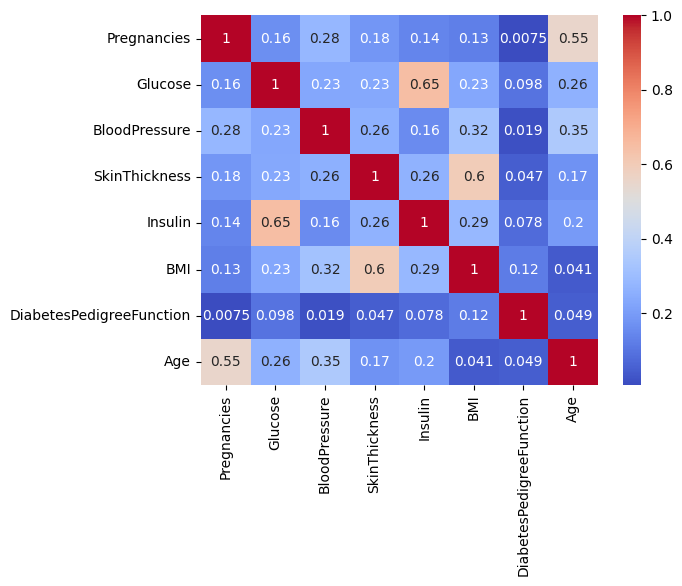

In [400]:
import seaborn as sns

sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [401]:
df_scaled.var().sort_values()

SkinThickness               1.001342
Pregnancies                 1.001342
Glucose                     1.001342
BloodPressure               1.001342
BMI                         1.001342
Age                         1.001342
Insulin                     1.001342
DiabetesPedigreeFunction    1.001342
dtype: float64

In [402]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.534675,0.899389,-0.017049,0.700266,0.201472,0.215721,0.538545,1.468543
1,-1.148594,-1.198060,-0.547725,0.006847,-0.629162,-0.849481,-0.363334,-0.176532
2,1.207982,2.064638,-0.724617,0.076189,2.504085,-1.351647,0.685590,-0.089949
3,-1.148594,-1.064889,-0.547725,-0.686571,-0.633615,-0.621223,-0.964587,-1.042360
5,0.198021,-0.165982,0.159843,0.792722,0.034454,-1.001652,-0.853486,-0.263114
